In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Datasets/Social_Network_Ads.csv")
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
X = data[['Age', 'EstimatedSalary']].values
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [10]:
y = data['Purchased'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
import seaborn as sns

sns.scatterplot(data=data,x="Age",y="EstimatedSalary",hue="Purchased",palette="deep")

#Support Vector Machine Testing

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# kernel:
# linear = 0,9
# poly = 0,86
# rbf = 0,93
# sigmoid = 0,74

In [ ]:
y_pred = classifier.predict(X_test)

#Confusion Matriks

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Asumsikan dataset ada dalam DataFrame `data` dengan kolom 'Age', 'EstimatedSalary', dan 'Purchased'
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_rbf.predict(X_test)

# Create a new DataFrame with predictions
new_table = pd.DataFrame(X_test, columns=['Age', 'EstimatedSalary'])
new_table['Purchased_Predicted'] = y_pred

print(new_table.head())

#Visualization

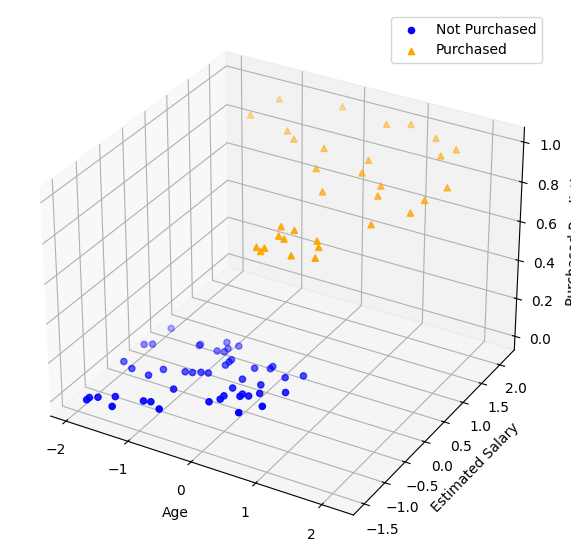

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Asumsikan dataset ada dalam DataFrame `data` dengan kolom 'Age', 'EstimatedSalary', dan 'Purchased'
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_rbf.predict(X_test)

# Create a new DataFrame with predictions
new_table = pd.DataFrame(X_test, columns=['Age', 'EstimatedSalary'])
new_table['Purchased_Predicted'] = y_pred

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Separate the predictions into two groups for different colors
group0 = new_table[new_table['Purchased_Predicted'] == 0]
group1 = new_table[new_table['Purchased_Predicted'] == 1]

# Scatter plot
ax.scatter(group0['Age'], group0['EstimatedSalary'], zs=0, zdir='z', label='Not Purchased', color='blue', marker='o')
ax.scatter(group1['Age'], group1['EstimatedSalary'], zs=1, zdir='z', label='Purchased', color='orange', marker='^')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Purchased Prediction')

# Add legend and show plot
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


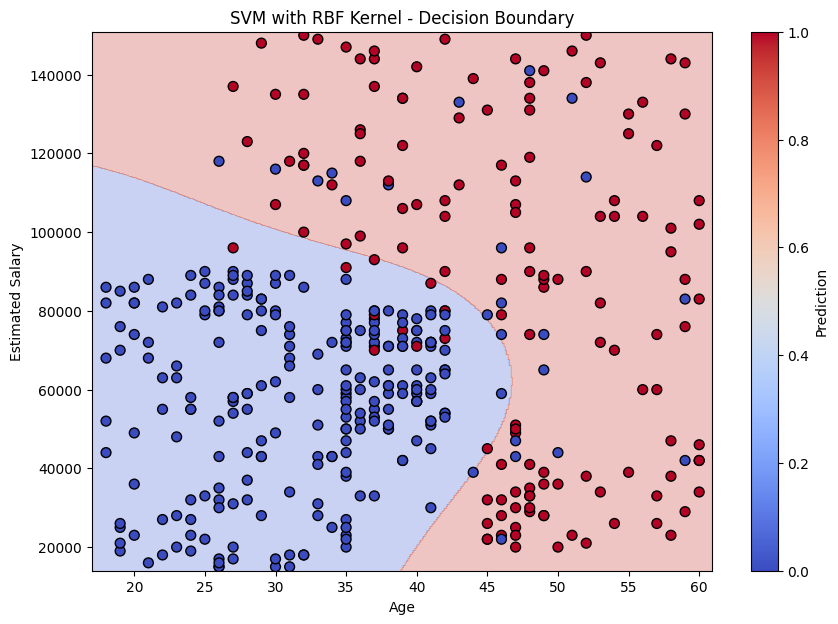

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asumsikan dataset ada dalam DataFrame `data` dengan kolom 'Age', 'EstimatedSalary', dan 'Purchased'
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 100))

# Predict the function values for the whole grid
Z = svm_rbf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['Age'], X['EstimatedSalary'], c=y, cmap='coolwarm', s=50, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with RBF Kernel - Decision Boundary')
plt.colorbar(label='Prediction')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


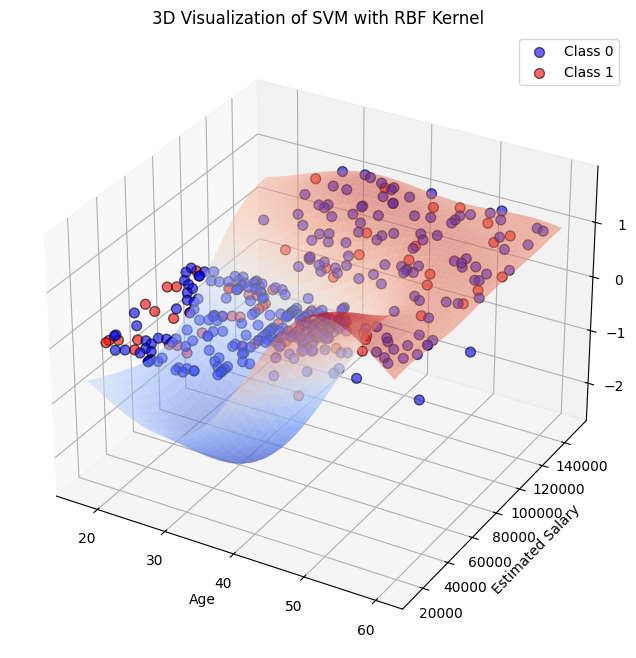

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asumsikan dataset ada dalam DataFrame `data` dengan kolom 'Age', 'EstimatedSalary', dan 'Purchased'
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 1000))

# Predict the decision function for the whole grid
Z = svm_rbf.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plotting in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='coolwarm', edgecolor='none', alpha=0.5)

# Scatter plot of actual data points
# Convert back X_train and X_test to original scale
X_plot = scaler.inverse_transform(X_train)
X_test_plot = scaler.inverse_transform(X_test)
ax.scatter(X_plot[:, 0], X_plot[:, 1], y_train, color='blue', s=50, label="Class 0", alpha=0.6, edgecolors='k')
ax.scatter(X_test_plot[:, 0], X_test_plot[:, 1], y_test, color='red', s=50, label="Class 1", alpha=0.6, edgecolors='k')

# Label the axes
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Decision Function Value')
ax.set_title('3D Visualization of SVM with RBF Kernel')

# Add legend
ax.legend()
plt.show()


#Evaluation

Conffusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 1, 27]])

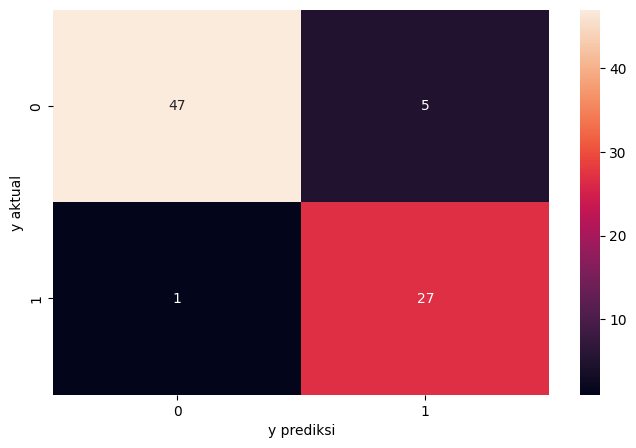

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

Accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.925

Recall

In [ ]:
recall = 27/(27+1)
recall

0.9642857142857143

Precision

In [ ]:
precis = 27/(27+5)
precis

0.84375

F1 Score

In [ ]:
f1 = 2*(recall*precis)/(recall+precis)
f1

0.8999999999999999

Overfitting & Underfitting

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[187,  18],
       [ 10, 105]])

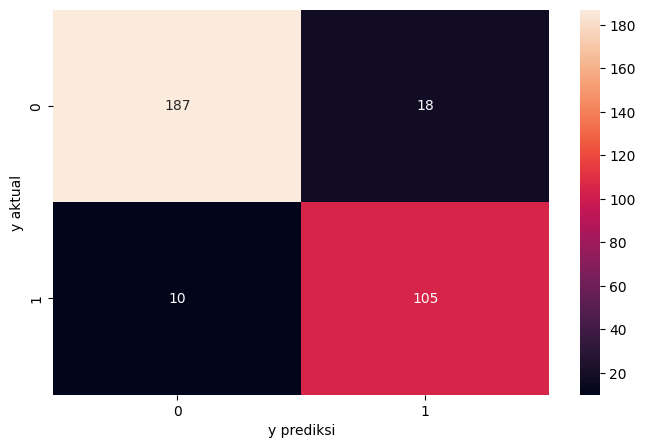

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_train, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9125

#Prediksi Data Testing

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[47,  5],
       [ 1, 27]])

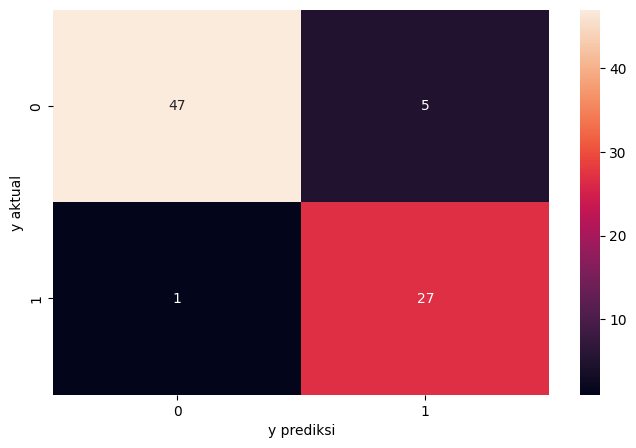

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_test, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()